In [2]:
from qaravan.core import brickwall_skeleton, two_local_circ
from qaravan.tensorQ import StatevectorSim, random_sv, all_zero_sv
import torch
from plotter import *

In [4]:
n = 4
num_layers = 2

target_sv = torch.tensor(random_sv(n))
skeleton = brickwall_skeleton(n, num_layers)

params = torch.nn.Parameter(torch.randn(15*len(skeleton))*1e-2)
optimizer = torch.optim.Adam([params], lr=0.05)

cost_list = []
for _ in range(10000): 
    circ = two_local_circ(skeleton, params)
    sim = StatevectorSim(circ, backend="torch")
    sim.run(progress_bar=False)
    ansatz_sv = sim.get_statevector()
    
    cost = 1 - torch.abs(torch.sum(ansatz_sv.conj() * target_sv))**2
    cost_list.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if _ % 100 == 0:
        print(f"Cost at iteration {_}: {cost.item()}")
    if cost_list[-1] < 1e-8:
        break

Cost at iteration 0: 0.9821401171663603
Cost at iteration 100: 0.00010761380682189348


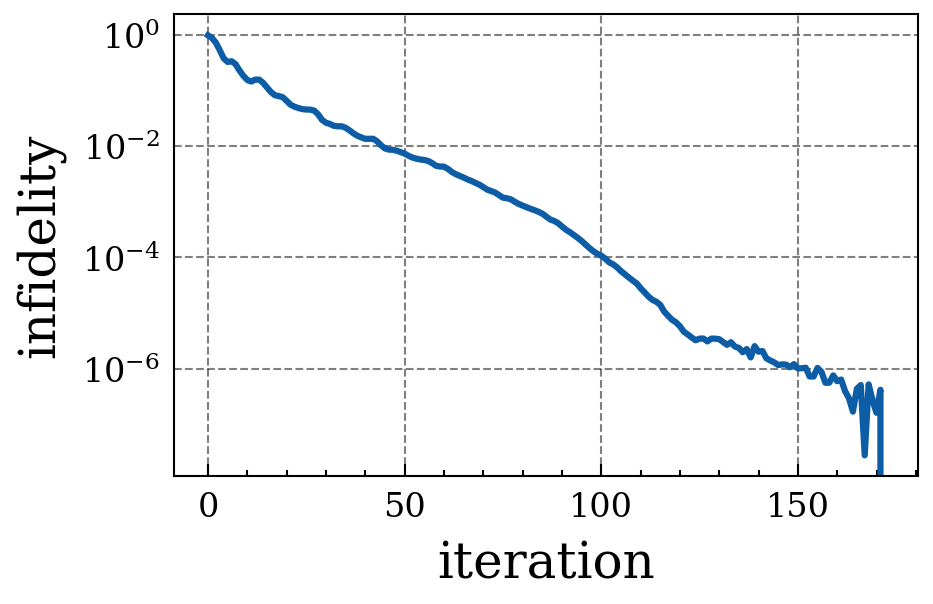

In [6]:
set_style()
fig, ax = plt.subplots(figsize=(3.2,2))
ax.plot(cost_list, lw=1.5, color="C0")
ax.set_xlabel("iteration", fontsize=12)
ax.set_ylabel("infidelity", fontsize=12)
ax.set_yscale("log")
